In [1]:
import copy

import numpy as np
import scipy
from matplotlib import pyplot as plt

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [33]:

N0 = 100
N1 = 100
N_total = N0+N1

f_mat = np.zeros((3, N_total))
f_mat[0,:] = np.concatenate((np.random.randn(N0), np.zeros(N1)))*1
f_mat[1,:] = np.concatenate((np.zeros(N0), np.random.randn(N1)))
f_mat[2,:] = (f_mat[0,:]+f_mat[1,:])*1

offset_matrix = np.zeros((2, N_total))
offset_matrix[0,:] = np.concatenate((np.ones(N0), np.zeros(N1)))
offset_matrix[1,:] = np.concatenate((np.zeros(N0), np.ones(N1)))
# offset_matrix[2,:] = 1#np.ones((N_total))

In [26]:
num_neurons = 100
num_dim = 3

#define random orthogonal dimensions in neural activity
Q,R = np.linalg.qr(np.random.randn(num_neurons, num_dim))

In [75]:
X = np.zeros((num_neurons,N_total))
for i in range(num_dim):
    noise = np.random.randn(N_total)*0
    s = f_mat[i,:]+noise
    
    X+= Q[:,i].reshape((-1,1))@s.reshape((1,-1)) #f_mat[i,:].reshape((1,-1))


<IPython.core.display.Javascript object>


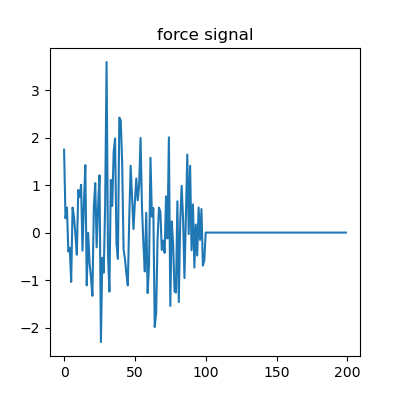

<IPython.core.display.Javascript object>


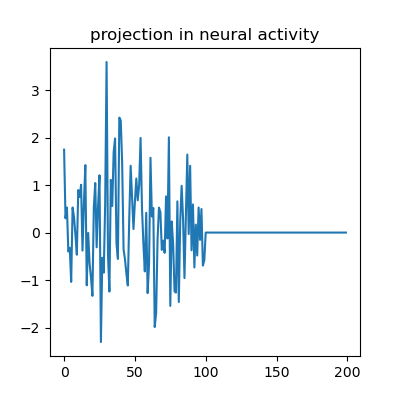

Text(0.5, 1.0, 'projection in neural activity')

In [76]:
#Verify construction of neural activity
i = 0

plt.figure(figsize=(4,4))
plt.plot(f_mat[i,:])
plt.title('force signal')

proj = Q[:,i]@X
plt.figure(figsize=(4,4))
plt.plot(proj)
plt.title('projection in neural activity')

<IPython.core.display.Javascript object>


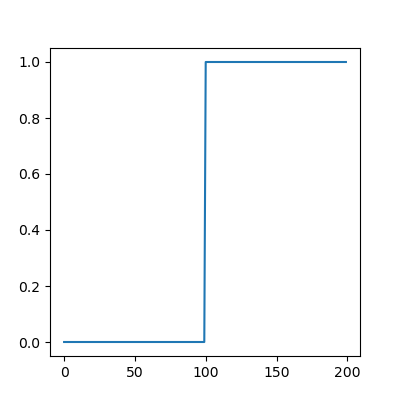

In [77]:
#Verify construction of neural activity
i = 1

plt.figure(figsize=(4,4))
plt.plot(offset_matrix[i,:])
# plt.title('force signal')

In [78]:
# Form the feature matrix
feature_mat = np.vstack((f_mat, offset_matrix))
print(feature_mat.shape)

(5, 200)


In [79]:
#X: n_samples X n_features
#y: n_samples


clf = Ridge(alpha=1e-1).fit(feature_mat.T, X.T)#, sample_weight=sample_weight)
# clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 5, 1e1]).fit(X.T, f1) # , sample_weight=sample_weight)
# clf = LinearRegression().fit(X.T, f1_)

# print(clf.score(X[:,N0:].T, y[N0:]))
# print(clf.score(X[:,:N0].T, y[:N0]))

print(clf.score(feature_mat.T, X.T))

c = clf.coef_

0.9999996223559271


In [80]:
c.shape

(100, 5)

<IPython.core.display.Javascript object>


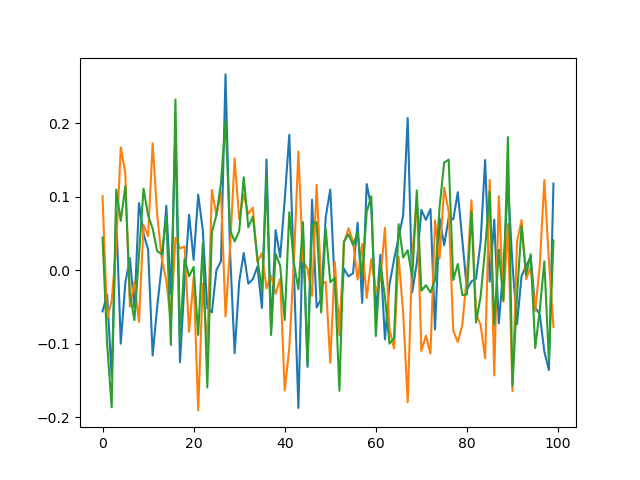

In [81]:
## Inspect dimensions
plt.figure()
plt.plot(c[:,0])
plt.plot(c[:,1])
plt.plot(c[:,2])

In [87]:
print('Projections of model parameters on dimensions that encode A-force, B-force, General-force')
dim_list = ['A dimension', 'B dimension', 'general dimension']
for i_model in range(num_dim):
    print('')
    print(dim_list[i_model])
    for i_dim in range(num_dim):
        print(c[:,i_model]@Q[:,i_dim])

Projections of model parameters on dimensions that encode A-force, B-force, General-force

A dimension
0.666145898720718
-0.33291439067470646
0.33323150804606894

B dimension
-0.33291439067383977
0.6661399280392625
0.3332255373654798

general dimension
0.3332315080453455
0.33322553736562344
0.6664570454109113


In [83]:
c[:,0] @ c[:,1]
    

-0.33249587588400875

In [85]:
scipy.linalg.subspace_angles(c[:,0].reshape((-1,1)), c[:,1].reshape((-1,1)))*180/np.pi

array([60.03119872])

In [86]:
scipy.linalg.subspace_angles(c[:,0].reshape((-1,1)), c[:,1:])*180/np.pi

array([6.26590717e-11])

In [72]:
## Inspect offsets
# plt.figure()
# plt.plot(c[:,3])
# plt.plot(c[:,4])